<a href="https://colab.research.google.com/github/cmcoto/Book-Crossing-DeepLearning/blob/master/Book_Crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Get Latest version of  FAST.AI So I can use many tools...Don't know yet what I might need!**

In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   1692      0 --:--:-- --:--:-- --:--:--  1692
    100% |████████████████████████████████| 5.7MB 7.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.5MB 24kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61eac000 @  0x7f01b45a12a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Cloning into 'course-v3'...
remote: Enumerating objects: 2450, done.
remote: Total 2450 (delta 0), re

**Connect Google Drive!**

In [0]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Check that it mounted Correctly!

In [0]:
with open('/content/gdrive/My Drive/data/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

Get Path! To read csv file

In [0]:
!ls "/content/gdrive/My Drive/data/bookCrossing"

BX-Book-Ratings.csv  BX-Books.csv  BX-Users.csv


GET THE **DATA**

In [0]:
import pandas as pd
import numpy as np


In [0]:
ratings = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Book-Ratings.csv', delimiter=";", encoding="latin1")
ratings.columns = ['userId', 'ISBN', 'bookRating']

In [0]:
ratings.head(5)

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [0]:
users = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Users.csv', delimiter=";", encoding="latin1")
users.columns = ['userId', 'location', 'age']

In [0]:
users.head()

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [0]:
books = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Books.csv', delimiter=";", encoding="latin-1", error_bad_lines=False)
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageURLS,imageURLM,imageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [0]:
print(ratings.shape)
print(users.shape)
print(books.shape)


(1149780, 3)
(278858, 3)
(271360, 8)


Do we need the images column in Books? Probably not.

In [0]:
books.drop(['imageURLS','imageURLM','imageURLL'], axis=1, inplace=True)

In [0]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**DATA WRANGLING**

Let's check the Data Types... 


In [0]:
ratings.dtypes

userId         int64
ISBN          object
bookRating     int64
dtype: object

In [0]:
pd.set_option('display.max_colwidth', -1)

In [0]:
ratings['bookRating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [0]:
users.dtypes

userId      int64  
location    object 
age         float64
dtype: object

In [0]:
books.dtypes


ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

For Data wrangling, I will follow some of the steps used by Chhavi Saluja, in: [TowardsDataScience](https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847)

In [0]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

The Types are mixed, between Integers and Strings... Must set one type. Then there are wrong Data, in that they have set Publisher instead of year of publication 'Dk Publishing' and ''Gallimard'. There are also some numbers that make no sense...like 0, # > 2004... Need to take care of them also.

In [0]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [0]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"



In [0]:
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [0]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [0]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'

In [0]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [0]:
sorted(books['yearOfPublication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [0]:
books.loc[books.yearOfPublication == 0,:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri
641,0345251733,Rainbow the Stormy Life of Judy Garland,Christopher Finch,0,Ballantine Books
646,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc
728,2070362388,Ravage,Rene Barjavel,0,Gallimard French
732,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French
735,2070334368,La Guerre Des Boutons,Pergaud,0,Livre de Poche


O.k. so there are a lot of books with yearOfPublication == 0. 

In [0]:
books.loc[books.yearOfPublication == 1376,:]


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


O.k. So Now that we have the data ready... let's prepare our dataset, combining some parts of the three tables into one that means something, at least to me...?!

Let's use Pandas merge function to merge the ratings table with parts of the book table... 

In [0]:
rating_book = pd.merge(ratings, books, on='ISBN')

In [0]:
rating_book.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


Keep merging the Tables...

In [0]:
all_ratings = pd.merge(rating_book, users, on='userId')

**Check the new Data Set...**

In [0]:
all_ratings.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


Let's do some visual understanding of the Data...

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


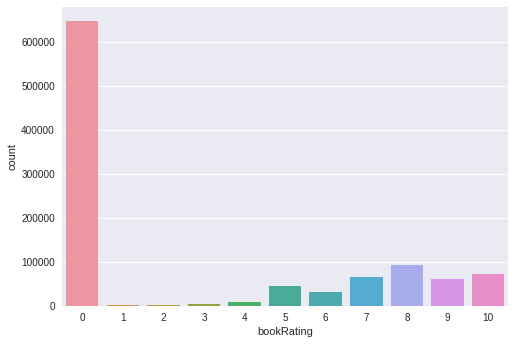

In [0]:
sns.countplot(all_ratings.bookRating)
plt.show()

We can see that the Dataset has a high degree of Sparcity... Lot's of Cero's 
As taken from the Book-Crossing Dataset information: 

"Ratings (`Book-Rating`) are either **explicit, expressed on a scale from 1-10 **(higher values denoting higher appreciation), or implicit, expressed by 0." We may segmentate the data, into a ratings_explicit dataset, and a ratings_implicit dataset.

In [0]:
#Segragating implicit and explict ratings datasets
ratings_explicit = all_ratings[all_ratings.bookRating != 0]
ratings_implicit = all_ratings[all_ratings.bookRating == 0]


In [0]:
ratings_explicit.head()



,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0


In [0]:
print (all_ratings.shape)
print (ratings_explicit.shape)
print (ratings_implicit.shape)

(1031136, 9)
(383842, 9)
(647294, 9)


O.K. Let's Rock n Roll! Time to check out the Data... with Deep Learning!
Time to load up** Fast.ai** We can try two versions... one with all_ratings(Explicit, and Implicit), and see if it works, and another without the Implicit ratings... just using the explicit_ratings one... Then, we could in production keep making new ratings lots with books that were not rated and now are, and feed them back to our explicit_ratings learner data bunch... 

In [0]:
from fastai import *
from fastai.collab import *

Create a CollabDataBunch with All_ratings...

In [0]:
data = CollabDataBunch.from_df(all_ratings, seed=42, pct_val=0.1, item_name="bookTitle")

In [0]:
data.show_batch()

userId,bookTitle,target
89602,A Wild Sheep Chase: A Novel (Plume Contemporary Fiction),7.0
278418,Dolores Claiborne,0.0
261829,The Cold One,0.0
50141,Thief of Souls,0.0
37208,On Her Doorstep,8.0
153662,Big Sky Lawman (Montana Mavericks) (Montana Mavericks),0.0
161946,Charlie and the Chocolate Factory (Puffin Novels),8.0
127429,RAMONA THE PEST (Ramona Quimby (Paperback)),0.0


Create a Collab_learner

In [0]:
learn = collab_learner(data, n_factors=20,  y_range=(0.,10.0), wd=1e-1)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


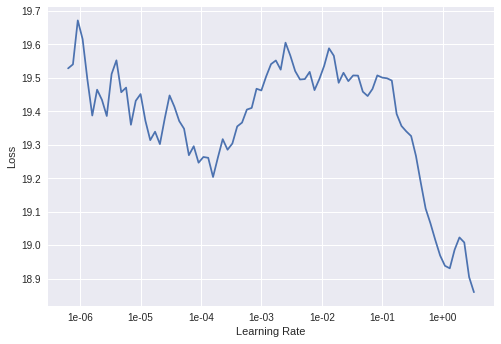

In [0]:
learn.recorder.plot()

O.k. Now, lets try a Fit...using 20 factors... we see in the plot that we could use the Learning Rate...

In [0]:
learn.fit_one_cycle(5, 5e-2)

Total time: 16:15
epoch  train_loss  valid_loss
1      13.539260   13.907741   (03:12)
2      14.242652   14.153863   (03:16)
3      13.978994   13.902764   (03:14)
4      13.377132   13.454253   (03:15)
5      13.097713   13.061069   (03:16)



In [0]:
learn.save('all_ratings_fit1')

In [0]:
data = CollabDataBunch.from_df(ratings_explicit, seed=42, pct_val=0.1, item_name="bookTitle")

Create a CollabDataBunch with ratings_explicit...

In [0]:
data.show_batch()

userId,bookTitle,target
157945,Chain of Evidence,5.0
75585,And Then There Were None : A Novel,8.0
248259,Teach Yourself VISUALLY Flash 5,10.0
28448,Anne Frank: The Diary of a Young Girl,9.0
41449,Memories of a Catholic Girlhood (A Harvest/Hbj Book),9.0
189104,Exit to Eden,10.0
204430,Animal Homes (First Discovery Look-It-Up Board Books),8.0
252695,Chile Death: A China Bayles Mystery (China Bayles Mysteries (Hardcover)),8.0


Create a Collab_learner

In [0]:
learn = collab_learner(data, n_factors=20,  y_range=(1.0,10.0), wd=1e-1)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


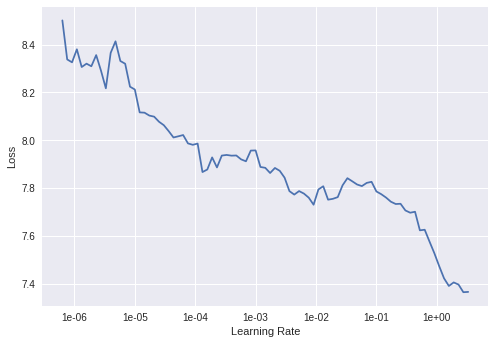

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 5e-3)

Total time: 04:53
epoch  train_loss  valid_loss
1      4.878034    4.788813    (00:59)
2      4.153859    4.349168    (00:58)
3      4.267548    4.282271    (00:57)
4      4.005231    4.241577    (00:59)
5      3.639077    4.234578    (00:58)



In [0]:
learn.save('ratings_explicit_fit1')

In [0]:
learn.load('ratings_explicit_fit1')

CollabLearner(data=TabularDataBunch;
Train: LabelList
y: FloatList (345458 items)
[FloatItem 5.0, FloatItem 9.0, FloatItem 8.0, FloatItem 9.0, FloatItem 5.0]...
Path: .
x: CollabList (345458 items)
[CollabLine userId 2313; bookTitle Flesh Tones: A Novel; , CollabLine userId 2313; bookTitle Ender's Game (Ender Wiggins Saga (Paperback)); , CollabLine userId 2313; bookTitle In Cold Blood (Vintage International); , CollabLine userId 2313; bookTitle Divine Secrets of the Ya-Ya Sisterhood : A Novel; , CollabLine userId 2313; bookTitle The Mistress of Spices; ]...
Path: .;
Valid: LabelList
y: FloatList (38384 items)
[FloatItem 9.0, FloatItem 6.0, FloatItem 9.0, FloatItem 10.0, FloatItem 9.0]...
Path: .
x: CollabList (38384 items)
[CollabLine userId 248479; bookTitle What to Expect When You're Expecting, Third Edition; , CollabLine userId 6789; bookTitle Miss Zukas Shelves the Evidence (Miss Zukas Mysteries); , CollabLine userId 136348; bookTitle A Tree Grows in Brooklyn; , CollabLine userId 2

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(64126, 20)
  (i_weight): Embedding(126487, 20)
  (u_bias): Embedding(64126, 1)
  (i_bias): Embedding(126487, 1)
)

**Top Rated Books**

In [0]:
g = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books[:10]

array(['The Lovely Bones: A Novel', 'Wild Animus', 'The Da Vinci Code', 'The Secret Life of Bees',
       'The Nanny Diaries: A Novel', 'The Red Tent (Bestselling Backlist)', "Bridget Jones's Diary", 'A Painted House',
       'Life of Pi', 'Harry Potter and the Chamber of Secrets (Book 2)'], dtype=object)

 **Book Bias**

In [0]:
book_bias = learn.bias(top_books, is_item=True)
book_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = ratings_explicit.groupby(ratings_explicit.bookTitle)['bookRating'].mean()
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books, book_bias)]

In [0]:
item0 = lambda o:o[0]

The following Books are Biased, meaning rated better than expected... or something 

In [0]:
sorted(book_ratings, key=item0)[:15]

[(tensor(-0.3036), 'Wild Animus', 4.3907056798623065),
 (tensor(-0.0968), 'Four Blondes', 5.393939393939394),
 (tensor(-0.0568), 'Isle of Dogs', 5.433962264150943),
 (tensor(-0.0262), '4 Blondes', 5.653846153846154),
 (tensor(0.0363), 'Sex &amp; the City', 6.184210526315789),
 (tensor(0.0463), 'Wifey', 6.696428571428571),
 (tensor(0.0490), 'Violin', 6.1063829787234045),
 (tensor(0.0513),
  'Scarlett : The Sequel to Margaret Mitchell\'s \\Gone With the Wind\\""',
  7.0),
 (tensor(0.0521),
  "Full Tilt (Janet Evanovich's Full Series)",
  6.568627450980392),
 (tensor(0.0575), 'The Little Friend', 6.2727272727272725),
 (tensor(0.0652), "Dr. Atkins' New Diet Revolution", 6.813953488372093),
 (tensor(0.0672),
  'Forever... : A Novel of Good and Evil, Love and Hope',
  6.945945945945946),
 (tensor(0.0673), 'The Sky Is Falling', 6.341463414634147),
 (tensor(0.0679), 'September', 7.0),
 (tensor(0.0682), 'The Voice of the Night', 6.951219512195122)]

The Following Books, are **Highly Biased to be good** and they are **really Rated good. **

In [0]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.8557),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  8.936507936507937),
 (tensor(0.8187), 'The Secret Life of Bees', 8.47783251231527),
 (tensor(0.8160), 'The Lovely Bones: A Novel', 8.185289957567186),
 (tensor(0.7714), 'To Kill a Mockingbird', 8.97752808988764),
 (tensor(0.7679), 'The Da Vinci Code', 8.43927125506073),
 (tensor(0.7115),
  "Ender's Game (Ender Wiggins Saga (Paperback))",
  8.920529801324504),
 (tensor(0.7027),
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  8.588),
 (tensor(0.6901),
  'Harry Potter and the Chamber of Secrets (Book 2)',
  8.840490797546012),
 (tensor(0.6757), 'The Red Tent (Bestselling Backlist)', 8.182767624020888),
 (tensor(0.6587),
  'Harry Potter and the Prisoner of Azkaban (Book 3)',
  9.04332129963899),
 (tensor(0.6583), 'A Prayer for Owen Meany', 8.615384615384615),
 (tensor(0.6356),
  "Where the Heart Is (Oprah's Book Club (Paperback))",
  8.142372881355932),
 (tensor(0.6353

**Book Weights** These are the weights used for our Learner in n_factors...in which case we used 20, so there should be 20 weights, or factors. 

In [0]:
book_weights = learn.weight(top_books, is_item=True)
book_weights.shape

torch.Size([1000, 20])

Good, we fed it 1000 of the items, and we asked for n_factors = 20, as we can see, the torch size is 1000 x 20...